<a href="https://colab.research.google.com/github/abhishek02git/MLAI/blob/master/R6_ExternalLab_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
import numpy as np

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
# Check unique values in Category
print (np.unique(trainY))
print (np.unique(testY))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [0]:
# There are 10 Categories
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
print (trainX.shape)

(60000, 28, 28)


In [36]:
28*28

784

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

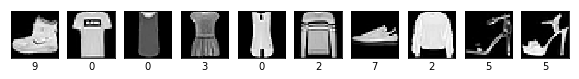

In [34]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.gray)
    plt.xlabel(int(np.where([trainY[i]==1])[1]))
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [37]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Flatten the image data from 2d to 1d --> 28X28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

W0703 17:06:03.938211 139975254472576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Execute the model using model.fit()

In [38]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 2018.5549 - acc: 0.7412 - val_loss: 2842.1957 - val_acc: 0.6661
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 1588.7519 - acc: 0.7796 - val_loss: 2459.4804 - val_acc: 0.7448
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 1511.8865 - acc: 0.7890 - val_loss: 1066.9607 - val_acc: 0.8052
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 1480.4085 - acc: 0.7902 - val_loss: 1270.9464 - val_acc: 0.8057
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 1488.7219 - acc: 0.7914 - val_loss: 1355.6780 - val_acc: 0.7826
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 1466.1140 - acc: 0.7954 - val_loss: 1159.3882 - val_acc: 0.8039
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Flatten the image data from 2d to 1d --> 28X28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [42]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5918 - acc: 0.7976 - val_loss: 0.5223 - val_acc: 0.8224
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4906 - acc: 0.8304 - val_loss: 0.5054 - val_acc: 0.8278
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4720 - acc: 0.8375 - val_loss: 0.4883 - val_acc: 0.8329
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4581 - acc: 0.8426 - val_loss: 0.4808 - val_acc: 0.8361
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4490 - acc: 0.8454 - val_loss: 0.4768 - val_acc: 0.8347
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4455 - acc: 0.8459 - val_loss: 0.4763 - val_acc: 0.8374
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4404 - acc: 0.8480 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4176 - acc: 0.8547 - val_loss: 0.4641 - val_acc: 0.8435
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4158 - acc: 0.8547 - val_loss: 0.4646 - val_acc: 0.8418
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4153 - acc: 0.8558 - val_loss: 0.4720 - val_acc: 0.8402
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4158 - acc: 0.8559 - val_loss: 0.4610 - val_acc: 0.8416
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4154 - acc: 0.8571 - val_loss: 0.4579 - val_acc: 0.8425
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4146 - acc: 0.8570 - val_loss: 0.4689 - val_acc: 0.8419
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4154 - acc: 0.8567 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Flatten the image data from 2d to 1d --> 28X28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


sgd = optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [55]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3918 - acc: 0.8613 - val_loss: 0.4039 - val_acc: 0.8527
Epoch 2/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3868 - acc: 0.8621 - val_loss: 0.4013 - val_acc: 0.8548
Epoch 3/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3830 - acc: 0.8617 - val_loss: 0.3985 - val_acc: 0.8549
Epoch 4/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3785 - acc: 0.8659 - val_loss: 0.3949 - val_acc: 0.8560
Epoch 5/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3753 - acc: 0.8652 - val_loss: 0.3934 - val_acc: 0.8567
Epoch 6/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3712 - acc: 0.8677 - val_loss: 0.3910 - val_acc: 0.8577
Epoch 7/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3679 - acc: 0.8685 - val_l

In [0]:
model.save('ex5')

In [0]:
predY = model.predict_classes(testX)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import seaborn as sns

In [105]:
print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.86      0.91      0.89      1000
           4       0.82      0.80      0.81      1000
           5       0.96      0.95      0.95      1000
           6       0.71      0.70      0.71      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



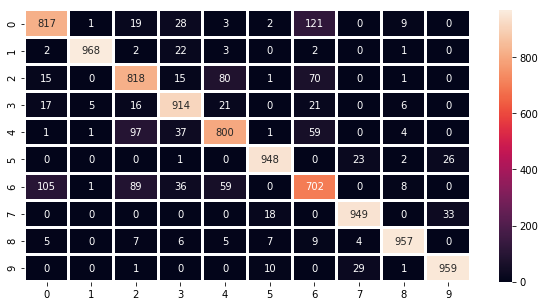

In [107]:
# Heat map of confusion matrix
cm = confusion_matrix(testY, predY)
plt.figure(figsize=(10,5))
sns.heatmap(cm, fmt='d', annot=True,linewidths=2)
plt.show()